In [1]:
!pip install pycocotools 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 403.3/403.3 kB 10.9 MB/s eta 0:00:00


In [2]:
!pip install gluoncv

In [3]:
!pip install torch==1.13.1 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 882.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 50.7 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0
    Uninstalling torch-1.11.0:
      Successfully uninstalled torch-1.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 2.10.1 requires torch<1.13.0,>=1.10.0, but you have torch 1.13.1 which is incompatible.


**IMPORT**

In [4]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import gluoncv
from gluoncv import model_zoo, data, utils
from pathlib import Path
import random,os
from skimage import io
from pycocotools.coco import COCO
import matplotlib.patches as patches
import time
from tqdm import tqdm
import matplotlib.patches as mpatches

/opt/conda/lib/python3.7/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.13.1+cu117` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [5]:
import mxnet as mx

**SET UP COCO DATAS**

In [6]:
DATA_PATH = "/kaggle/input/coco-2017-dataset/coco2017/val2017/"

# select which set you are going to use (here I used validation set)
annFile = Path('/kaggle/input/coco-2017-dataset/coco2017/annotations/instances_val2017.json')
coco = COCO(annFile)
imgIds = coco.getImgIds() # load all validation set ids

loading annotations into memory...
Done (t=1.35s)
creating index...
index created!


In [7]:
# function to get random image from validation set and it's annotaions through COCO API
def get_rand_img():
    img_id = random.choice(imgIds)
    img_metadata = coco.loadImgs([img_id]) 
    img = io.imread(DATA_PATH+img_metadata[0]['file_name'])
    annIds = coco.getAnnIds(imgIds=[img_id])
    anns = coco.loadAnns(annIds)
    return img,anns

**MODEL**

In [8]:
def test_model(model,img):
    
    # preprocessing 
    mx_img = mx.nd.array(img)
    x,original_img = data.transforms.presets.rcnn.transform_test(mx_img)
    
    # time measurement
    start = time.time()
    box_ids, scores, bboxes = model(x)
    t = time.time() - start
    
    # image with model detections boxes, scores and ids
    ax = utils.viz.plot_bbox(original_img, bboxes[0], scores[0], box_ids[0], class_names=model.classes)
    return ax,t

**Faster R-CNN (Two stage)**

In [9]:
rcnn = model_zoo.get_model('faster_rcnn_resnet50_v1b_coco', pretrained=True)
# https://cv.gluon.ai/model_zoo/detection.html

123472KB [00:02, 44926.62KB/s]                            


In [10]:
# bounding box is defined by four values in pixels [x_min, y_min, width, height]
def display_ground_truth(image,boxes):
    cpy_img = image.copy()
    fig, ax = plt.subplots()
    ax.imshow(cpy_img)
    for box in boxes:
        rect = patches.Rectangle((int(box['bbox'][0]), int(box['bbox'][1])), int(box['bbox'][2]), int(box['bbox'][3]), linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    ax.set_title("Ground Truth")
    plt.show()

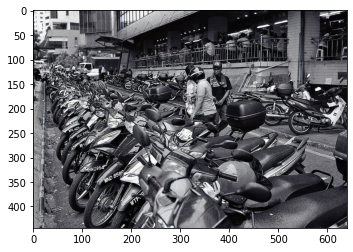

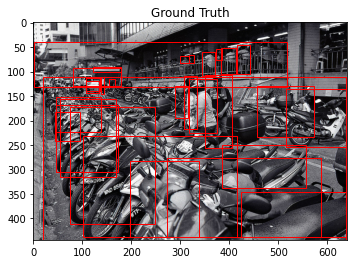

In [11]:
img,anns = get_rand_img()
plt.imshow(img)
display_ground_truth(img,anns)

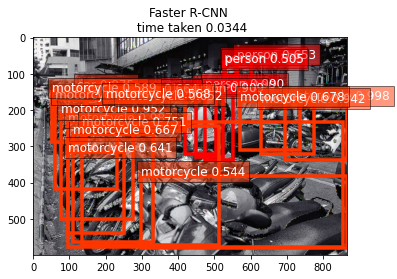

In [12]:
ax,t = test_model(rcnn,img)
ax.set_title(f"Faster R-CNN \n time taken {round(t,4)}",)
plt.show()

**Test  models**

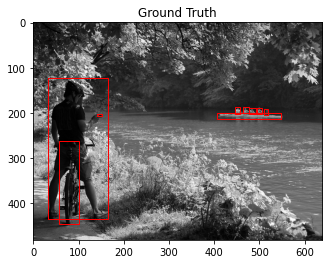

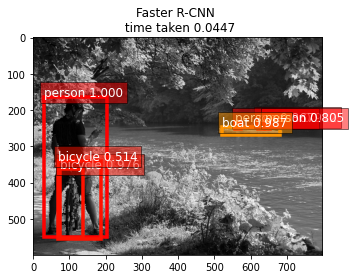

In [13]:
img,anns = get_rand_img()
display_ground_truth(img,anns)

ax1,t1 = test_model(rcnn,img)
ax1.set_title(f"Faster R-CNN \n time taken {round(t1,4)}",)
plt.show()

**Test on different Dataset**


In [14]:
def generate_img():
    PATH = "/kaggle/input/pascal-voc-2012/VOC2012/JPEGImages/"
    img_path = random.choice(os.listdir(PATH))
    rand_img = io.imread(PATH+img_path)
    return rand_img

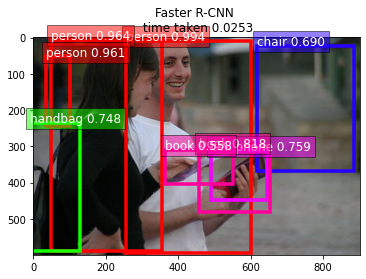

In [15]:
img = generate_img()
ax1,t1 = test_model(rcnn,img)
ax1.set_title(f"Faster R-CNN \n time taken {round(t1,4)}",)
plt.show()

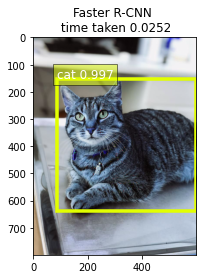

In [16]:
img_path = "/kaggle/input/test-model-by-me/OIP.jpg"
img = cv2.imread(img_path)
ax1,t1 = test_model(rcnn,img)
ax1.set_title(f"Faster R-CNN \n time taken {round(t1,4)}",)
plt.show()

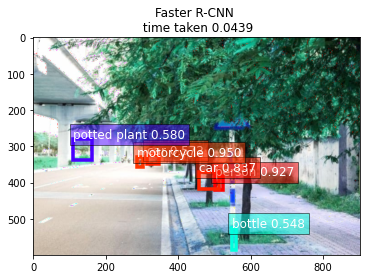

In [17]:
img_path = "/kaggle/input/test-model-by-me/test4.jpg"
img = cv2.imread(img_path)
ax1,t1 = test_model(rcnn,img)
ax1.set_title(f"Faster R-CNN \n time taken {round(t1,4)}",)
plt.show()

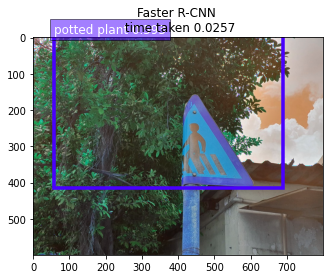

In [18]:
img_path = "/kaggle/input/test-model-by-me/test5.jpg"
img = cv2.imread(img_path)
ax1,t1 = test_model(rcnn,img)
ax1.set_title(f"Faster R-CNN \n time taken {round(t1,4)}",)
plt.show()

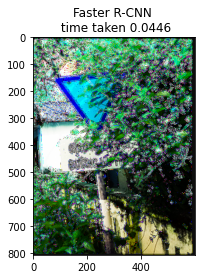

In [19]:
img_path = "/kaggle/input/test-model-by-me/test8.jpg"
img = cv2.imread(img_path)
ax1,t1 = test_model(rcnn,img)
ax1.set_title(f"Faster R-CNN \n time taken {round(t1,4)}",)
plt.show()

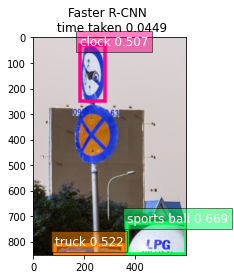

In [20]:
img_path = "/kaggle/input/test-model-by-me/test 9.PNG"
img = cv2.imread(img_path)
ax1,t1 = test_model(rcnn,img)
ax1.set_title(f"Faster R-CNN \n time taken {round(t1,4)}",)
plt.show()